In [33]:
import pandas as pd
from tensorflow.python.keras.layers import LSTM, Dense
from tensorflow.python.keras.models import Sequential
from tqdm import tqdm
from numpy import array

In [34]:
DATASET_PATH = \
    r"https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
DATE_COLUMN = "Month"
X_COLUMN = "Passengers"

# parse_dates : parses dates from string to DatetimeIndex
# index_col : set specified column as dataset index
df = pd.read_csv(DATASET_PATH, parse_dates=[DATE_COLUMN], index_col=DATE_COLUMN)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [35]:
# NOTE : You dont need the dates column here
x_train = df[X_COLUMN].values
x_test = df[X_COLUMN].values

# WILL USE THIS FOR DISPLAYING FINAL FORECAST
x_train_dis = x_train

x_test

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432])

In [36]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in tqdm(range(len(sequence))):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


n_steps = 3
n_features = 1

# dividing train sequence into input/output samples
x_train, y_train = split_sequence(x_train, n_steps=n_steps)

# dividing test sequence into input/output samples
x_test, y_test = split_sequence(x_test, n_steps=n_steps)

for i in range(len(x_train)):
    print(x_train[i], y_train[i])

 98%|█████████▊| 141/144 [00:00<00:00, 393739.59it/s]

[112 118 132] 129
[118 132 129] 121
[132 129 121] 135
[129 121 135] 148
[121 135 148] 148
[135 148 148] 136
[148 148 136] 119
[148 136 119] 104
[136 119 104] 118
[119 104 118] 115
[104 118 115] 126
[118 115 126] 141
[115 126 141] 135
[126 141 135] 125
[141 135 125] 149
[135 125 149] 170
[125 149 170] 170
[149 170 170] 158
[170 170 158] 133
[170 158 133] 114
[158 133 114] 140
[133 114 140] 145
[114 140 145] 150
[140 145 150] 178
[145 150 178] 163
[150 178 163] 172
[178 163 172] 178
[163 172 178] 199
[172 178 199] 199
[178 199 199] 184
[199 199 184] 162
[199 184 162] 146
[184 162 146] 166
[162 146 166] 171
[146 166 171] 180
[166 171 180] 193
[171 180 193] 181
[180 193 181] 183
[193 181 183] 218
[181 183 218] 230
[183 218 230] 242
[218 230 242] 209
[230 242 209] 191
[242 209 191] 172
[209 191 172] 194
[191 172 194] 196
[172 194 196] 196
[194 196 196] 236
[196 196 236] 235
[196 236 235] 229
[236 235 229] 243
[235 229 243] 264
[229 243 264] 272
[243 264 272] 237
[264 272 237] 211
[272 237 2

In [37]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], n_features))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], n_features))

In [38]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu',return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 3, 50)             10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [39]:
# fit model
model.fit(x_train, y_train,epochs=350,validation_data=(x_test,y_test))

Epoch 1/350
5/5 [==============================] - 6s 207ms/step - loss: 88228.3828 - val_loss: 81494.6250
Epoch 2/350
5/5 [==============================] - 0s 72ms/step - loss: 79310.2578 - val_loss: 74621.3672
Epoch 3/350
5/5 [==============================] - 0s 71ms/step - loss: 72192.0234 - val_loss: 67154.6250
Epoch 4/350
5/5 [==============================] - 0s 68ms/step - loss: 64114.9570 - val_loss: 58262.4805
Epoch 5/350
5/5 [==============================] - 0s 66ms/step - loss: 54707.1094 - val_loss: 46157.3398
Epoch 6/350
5/5 [==============================] - 0s 66ms/step - loss: 40379.1836 - val_loss: 29175.8848
Epoch 7/350
5/5 [==============================] - 0s 73ms/step - loss: 23296.9141 - val_loss: 13786.2822
Epoch 8/350
5/5 [==============================] - 0s 72ms/step - loss: 10164.9082 - val_loss: 4889.4390
Epoch 9/350
5/5 [==============================] - 0s 73ms/step - loss: 3644.4180 - val_loss: 3121.2881
Epoch 10/350
5/5 [==============================

In [40]:
# Inference
x_input = array([508,461,390])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[369.37894]]


In [41]:
# Testing on x_test
predictions = model.predict(x_test)
# bringing to similar shape
predictions = predictions.reshape(y_test.shape)

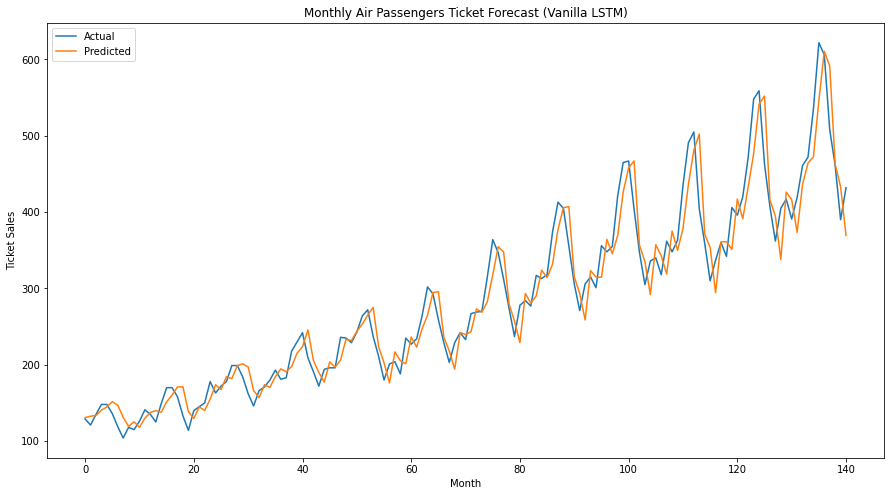

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.plot(y_test,label="Actual")
plt.plot(predictions,label="Predicted")
plt.legend()
plt.title("Monthly Air Passengers Ticket Forecast (Vanilla LSTM)")
plt.xlabel("Month")
plt.ylabel("Ticket Sales")
plt.show()

# **Predicting next N periods**

In [45]:
# Predicting next N values.
x_input = array([508,461,390]) # last values from x_train
temp_input=list(x_input)
lst_output=[]
i=0
# predict next 48 months
Predict_N_STEPS = 48
while(i<Predict_N_STEPS):
    
    if(len(temp_input)>3):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[369.37894]
1 day input [461.         390.         369.37893677]
1 day output [[337.3182]]
2 day input [390.         369.37893677 337.31820679]
2 day output [[300.97147]]
3 day input [369.37894 337.3182  300.97147]
3 day output [[276.53702]]
4 day input [337.3182  300.97147 276.53702]
4 day output [[254.08867]]
5 day input [300.97147 276.53702 254.08867]
5 day output [[237.22873]]
6 day input [276.53702 254.08867 237.22873]
6 day output [[236.82265]]
7 day input [254.08867 237.22873 236.82265]
7 day output [[256.2573]]
8 day input [237.22873 236.82265 256.2573 ]
8 day output [[263.16177]]
9 day input [236.82265 256.2573  263.16177]
9 day output [[266.80112]]
10 day input [256.2573  263.16177 266.80112]
10 day output [[276.58652]]
11 day input [263.16177 266.80112 276.58652]
11 day output [[286.13843]]
12 day input [266.80112 276.58652 286.13843]
12 day output [[293.7802]]
13 day input [276.58652 286.13843 293.7802 ]
13 day output [[302.17297]]
14 day input [286.13843 293.7802  302.1729

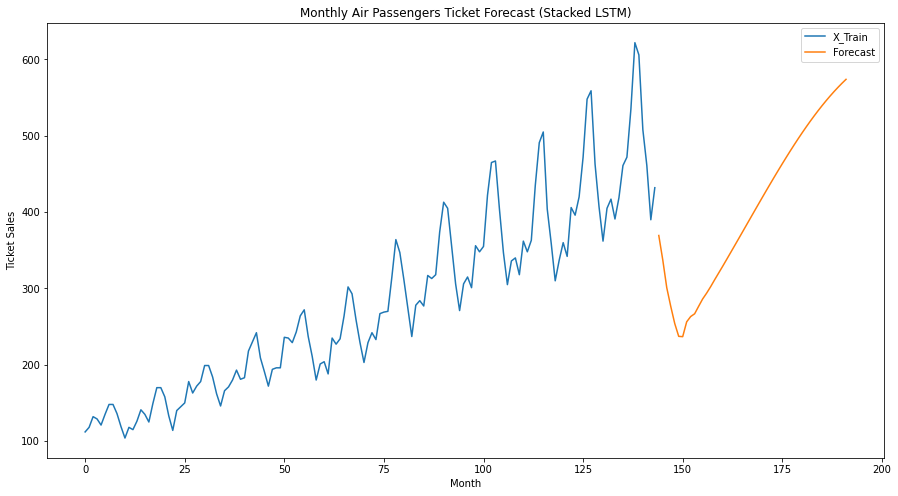

In [47]:
# plotting the forecast with original dataset
predictions = lst_output
import matplotlib.pyplot as plt
from numpy import arange

# creating x for our predictions
x = arange(len(x_train_dis),len(x_train_dis)+Predict_N_STEPS)

plt.figure(figsize=(15,8))
plt.plot(x_train_dis,label="X_Train")
plt.plot(x,predictions,label="Forecast")
plt.legend()
plt.title("Monthly Air Passengers Ticket Forecast (Stacked LSTM)")
plt.xlabel("Month")
plt.ylabel("Ticket Sales")
plt.show()